In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#import packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# To retrieve files/pathnames matching a specified pattern
import glob

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

In [6]:
TRAIN_DIR = '/content/drive/MyDrive/ASL_Dataset/Train'
TEST_DIR = '/content/drive/MyDrive/ASL_Dataset/Test'

In [7]:
# Load all the images under each class (subdirectory)
def load_images(base_dir, directories_as_labels=True, files='**/*.jpg'):
  filenames = glob.glob(os.path.join(base_dir, files))

  # Load all the subdirectories as classes
  classes = (os.path.basename(os.path.dirname(name)) for name in filenames)
  df = pd.DataFrame(list(zip(filenames, classes)), columns=['path', 'label'])

  return df

train_df = load_images(TRAIN_DIR)
test_df = load_images(TEST_DIR)

In [8]:
train_df

,path,label
0,/content/drive/MyDrive/ASL_Dataset/Train/U/U50...,U
1,/content/drive/MyDrive/ASL_Dataset/Train/U/U60...,U
2,/content/drive/MyDrive/ASL_Dataset/Train/U/U28...,U
3,/content/drive/MyDrive/ASL_Dataset/Train/U/U28...,U
4,/content/drive/MyDrive/ASL_Dataset/Train/U/U44...,U
...,...,...
165824,/content/drive/MyDrive/ASL_Dataset/Train/Y/191...,Y
165825,/content/drive/MyDrive/ASL_Dataset/Train/Y/203...,Y
165826,/content/drive/MyDrive/ASL_Dataset/Train/Y/169...,Y
165827,/content/drive/MyDrive/ASL_Dataset/Train/Y/239...,Y


In [9]:
batch_size = 16
IMAGE_SIZE = [200, 200]
num_class = len(train_df['label'].unique())

In [10]:
train_path = '/content/drive/MyDrive/ASL_Dataset/Train'
valid_path = '/content/drive/MyDrive/ASL_Dataset/Test'

In [11]:
import glob

In [12]:
image_files = glob.glob(train_path + '/*/*.jpg')
valid_image_files = glob.glob(valid_path + '/*/*.jpg')

In [13]:
folders = glob.glob(train_path + '/*')
folders

['/content/drive/MyDrive/ASL_Dataset/Train/U',
 '/content/drive/MyDrive/ASL_Dataset/Train/R',
 '/content/drive/MyDrive/ASL_Dataset/Train/N',
 '/content/drive/MyDrive/ASL_Dataset/Train/I',
 '/content/drive/MyDrive/ASL_Dataset/Train/Z',
 '/content/drive/MyDrive/ASL_Dataset/Train/Space',
 '/content/drive/MyDrive/ASL_Dataset/Train/T',
 '/content/drive/MyDrive/ASL_Dataset/Train/F',
 '/content/drive/MyDrive/ASL_Dataset/Train/Nothing',
 '/content/drive/MyDrive/ASL_Dataset/Train/H',
 '/content/drive/MyDrive/ASL_Dataset/Train/S',
 '/content/drive/MyDrive/ASL_Dataset/Train/G',
 '/content/drive/MyDrive/ASL_Dataset/Train/A',
 '/content/drive/MyDrive/ASL_Dataset/Train/O',
 '/content/drive/MyDrive/ASL_Dataset/Train/E',
 '/content/drive/MyDrive/ASL_Dataset/Train/K',
 '/content/drive/MyDrive/ASL_Dataset/Train/M',
 '/content/drive/MyDrive/ASL_Dataset/Train/C',
 '/content/drive/MyDrive/ASL_Dataset/Train/D',
 '/content/drive/MyDrive/ASL_Dataset/Train/V',
 '/content/drive/MyDrive/ASL_Dataset/Train/Q',
 '/

In [14]:
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

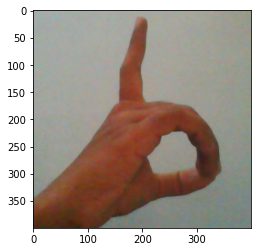

In [15]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [16]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [17]:
ptm.trainable = False

In [18]:
K = len(folders) # number of classes
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [19]:
model = Model(inputs=ptm.input, outputs=x)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [26]:
gen_train = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  preprocessing_function=preprocess_input,
  rescale=1.0/255.0
)

gen_test = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  rescale=1.0/255.0
)

In [27]:
batch_size = 128

# create generators
train_generator = gen_train.flow_from_directory(
  train_path,
  shuffle=True,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

valid_generator = gen_test.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

Found 165829 images belonging to 28 classes.
Found 112 images belonging to 28 classes.


In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
tf.test.is_gpu_available()

True

In [ ]:
r = model.fit_generator(
  
    train_generator,
    
    validation_data=valid_generator,
    epochs=1,
    
    steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
    validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


  23/1296 [..............................] - ETA: 9:43:22 - loss: 2.0781 - accuracy: 0.4694